In [17]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline
%config InlineBackend.figure_formats = ['retina']

#######################<
#       imports       #
#######################

from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts

sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk") # talk context is good for RISE presentations

Populating the interactive namespace from numpy and matplotlib


In [23]:
# load imdb data
df = pd.read_csv('./data/movies.csv', index_col='Title')
del df['Unnamed: 0']
df.head()

,Revenue,Budget,Runtime,Certificate,ReleaseDate,Score,Votes,Directors,Writers,Stars,Genres
Title,,,,,,,,,,,
The Shawshank Redemption,"$28,817,291","$25,000,000",2h 22m,13+,1995-03-10,93,2500000,['Frank Darabont'],"['Stephen King', 'Frank Darabont']","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",['Drama']
The Godfather,"$246,120,986","$6,000,000",2h 55m,18+,1973-10-01,92,1700000,['Francis Ford Coppola'],"['Mario Puzo', 'Francis Ford Coppola']","['Marlon Brando', 'Al Pacino', 'James Caan']","['Crime', 'Drama']"
The Godfather: Part II,"$48,035,783","$13,000,000",3h 22m,18+,1974-12-18,90,1200000,['Francis Ford Coppola'],"['Francis Ford Coppola', 'Mario Puzo']","['Al Pacino', 'Robert De Niro', 'Robert Duvall']","['Crime', 'Drama']"
The Dark Knight,"$1,005,973,645","$185,000,000",2h 32m,16+,2008-07-25,90,2500000,['Christopher Nolan'],"['Writers', 'Jonathan Nolan', 'Christopher Nol...","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['Action', 'Crime', 'Drama', 'Thriller']"
12 Angry Men,$955,"$350,000",1h 36m,15+,1960-04-01,90,740000,['Sidney Lumet'],['Reginald Rose'],"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']","['Crime', 'Drama']"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           250 non-null    object 
 1   WorldWideGross  240 non-null    float64
 2   Budget          221 non-null    float64
 3   ReleaseDate     250 non-null    object 
 4   Certificate     250 non-null    object 
 5   Runtime         244 non-null    float64
 6   Score           250 non-null    float64
 7   ScoreReviews    250 non-null    int64  
 8   ImdbReviews     250 non-null    int64  
 9   CriticReviews   250 non-null    int64  
 10  MetaScore       218 non-null    float64
 11  Directors       250 non-null    object 
 12  Writers         250 non-null    object 
 13  Stars           250 non-null    object 
 14  Genres          250 non-null    object 
 15  Country         250 non-null    object 
 16  Locations       236 non-null    object 
 17  Companies       250 non-null    obj

In [5]:
df.isnull().any()

Title             False
WorldWideGross     True
Budget             True
ReleaseDate       False
Certificate       False
Runtime            True
Score             False
ScoreReviews      False
ImdbReviews       False
CriticReviews     False
MetaScore          True
Directors         False
Writers           False
Stars             False
Genres            False
Country           False
Locations          True
Companies         False
dtype: bool

In [6]:
# print(np.where(df['Budget']>300_000_000))
df['WorldWideGross'].fillna(value=0, inplace=True)
df['Budget'].fillna(value=0, inplace=True)
df['Runtime'].fillna(value=0, inplace=True)
df['MetaScore'].fillna(value=0, inplace=True)
df['Locations'].fillna('Nowhere', inplace=True)
df.shape

(250, 18)

In [7]:
df['WorldWideGross'] = df['WorldWideGross'].astype(float)
df['Budget'] = df['Budget'].astype(float)
df['Runtime'] = df['Runtime'].astype(float)

In [8]:
print(np.where(df['WorldWideGross']==0))
print(np.where(df['Budget']==0))
print(np.where(df['Runtime']==0))
print(np.where(df['MetaScore']==0))

(array([ 84, 127, 161, 181, 189, 190, 221, 233, 240, 249]),)
(array([ 31,  77,  84,  89,  90,  91,  99, 107, 115, 126, 127, 164, 166,
       180, 182, 187, 189, 192, 202, 206, 209, 215, 224, 225, 232, 243,
       245, 248, 249]),)
(array([ 67, 140, 189, 211, 226, 236]),)
(array([ 55,  59,  62,  77,  89,  90,  91,  99, 100, 102, 104, 115, 127,
       150, 156, 180, 182, 184, 189, 190, 194, 202, 203, 209, 222, 223,
       224, 233, 239, 243, 245, 249]),)


In [9]:
df['Budget'][df['Budget']>330_000_000] = df['Budget'][df['Budget']<330_000_000].mean()

/tmp/ipykernel_6792/1404209010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Budget'][df['Budget']>330_000_000] = df['Budget'][df['Budget']<330_000_000].mean()


In [10]:
df['WorldWideGross'] = df['WorldWideGross'].replace(0, np.mean(df['WorldWideGross']))
df['Budget'] = df['Budget'].replace(0, np.mean(df['Budget']))
df['Runtime'] = df['Runtime'].replace(0, np.mean(df['Runtime']))
df['MetaScore'] = df['MetaScore'].replace(0, np.mean(df['MetaScore']))

In [11]:
df['Genres'] = df['Genres'].apply(lambda x: x.strip('[').strip(']').strip("'").split("', '"))

In [12]:
dummies = pd.get_dummies(df['Genres'].apply(pd.Series).stack()).sum(level=0)

df.drop('Genres', axis = 1, inplace=True)

X = pd.concat([df, dummies], axis = 1)

/tmp/ipykernel_6792/3999397812.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(df['Genres'].apply(pd.Series).stack()).sum(level=0)


In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorldWideGross  250 non-null    float64
 1   Budget          250 non-null    float64
 2   Runtime         250 non-null    float64
 3   Score           250 non-null    float64
 4   Action          250 non-null    uint8  
 5   Adventure       250 non-null    uint8  
 6   Animation       250 non-null    uint8  
 7   Biography       250 non-null    uint8  
 8   Comedy          250 non-null    uint8  
 9   Crime           250 non-null    uint8  
 10  Drama           250 non-null    uint8  
 11  Family          250 non-null    uint8  
 12  Fantasy         250 non-null    uint8  
 13  Film-Noir       250 non-null    uint8  
 14  History         250 non-null    uint8  
 15  Horror          250 non-null    uint8  
 16  Music           250 non-null    uint8  
 17  Musical         250 non-null    uin

In [14]:
# importing linear regression
lreg = LinearRegression()

X = X.drop(['Title', 'Certificate', 'ReleaseDate', 'MetaScore',
             'ImdbReviews', 'ScoreReviews', 'CriticReviews', 'Directors', 'Writers', 'Stars', 'Country',
             'Locations', 'Companies'], axis=1)

In [15]:
x_train, x_cv, y_train, y_cv = train_test_split(X, df['WorldWideGross'], test_size =0.3, random_state=22)

In [16]:
lreg.fit(x_train, y_train)

LinearRegression()

In [17]:
# evaluation using r-square
lreg.score(x_cv, y_cv)

1.0

<AxesSubplot:title={'center':'Modal Coefficients'}>

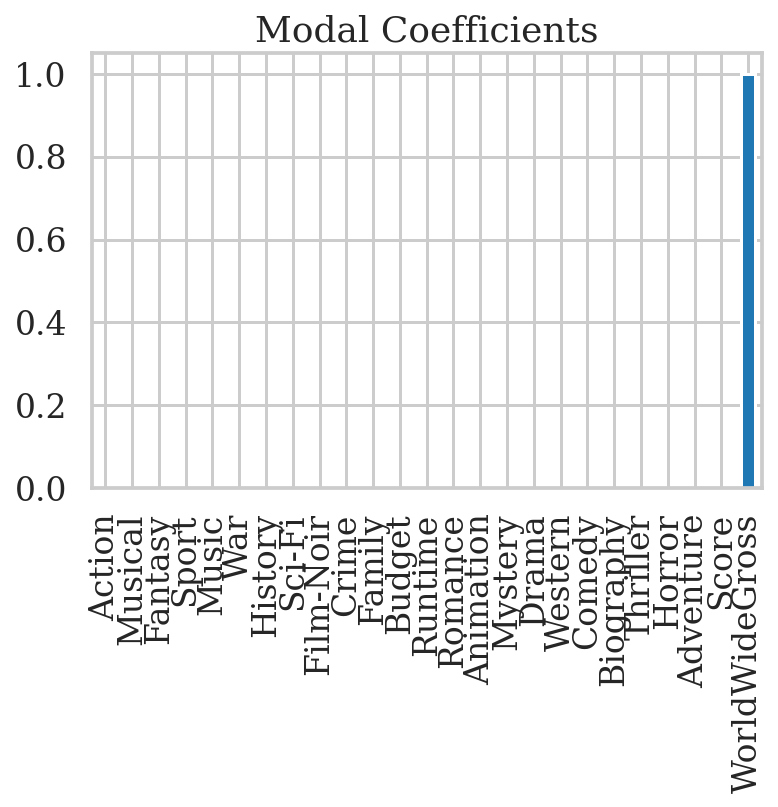

In [20]:
predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [21]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)

In [22]:
mse

326483150812004.5

In [23]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)
mse

1.0821239480251304e+16

In [24]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)
mse

6.519299221297467e+16

In [25]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)
mse

17.612081953667307

In [26]:
lassoReg.score(x_cv,y_cv)

0.9999999999999999

In [27]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)
mse

2.8314713248475684e-15

In [28]:
ENreg.score(x_cv,y_cv) #R-Squar

1.0

In [29]:
import datetime as dt
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [12]:
df['ReleaseDate']=df['ReleaseDate'].map(dt.datetime.toordinal)

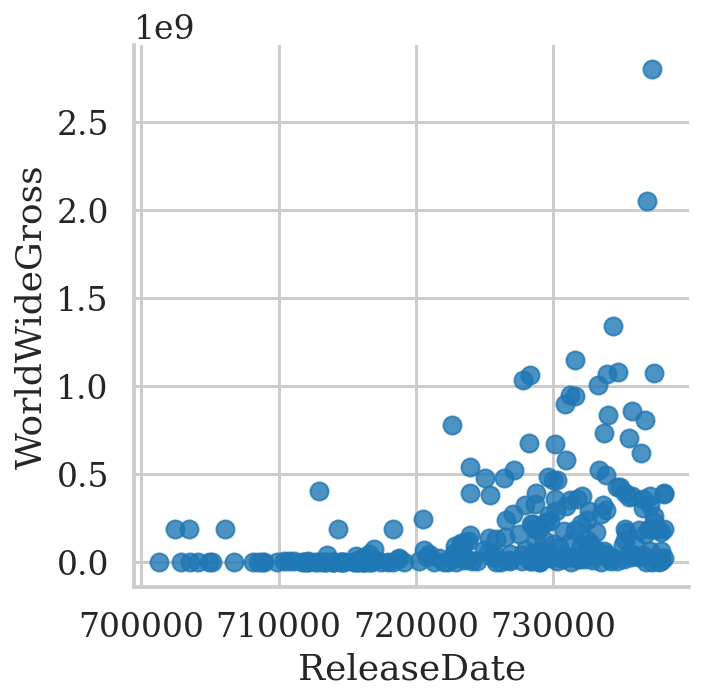

In [13]:
sns.lmplot(x='ReleaseDate', y='WorldWideGross', fit_reg=False,
           ci=None, data=df, height=5)

In [14]:
df['ReleaseDate']

0      728362
1      720532
2      720975
3      733248
4      715601
        ...  
245    714544
246    725639
247    737700
248    728327
249    736972
Name: ReleaseDate, Length: 250, dtype: int64

In [30]:
X

,WorldWideGross,Budget,Runtime,Score,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2.881729e+07,2.500000e+07,142.0,9.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.461210e+08,6.000000e+06,175.0,9.2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.803578e+07,1.300000e+07,202.0,9.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.005974e+09,1.850000e+08,152.0,9.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,9.550000e+02,3.500000e+05,96.0,9.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,7.553190e+05,3.073247e+07,110.0,8.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,3.090244e+07,1.600000e+07,98.0,8.1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
247,2.207548e+06,1.162000e+06,145.0,8.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,3.581969e+06,3.073247e+07,99.0,8.1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [44]:
train = X.sample(frac=0.8, random_state=200)
train.index
test = X.drop(train.index)

In [45]:
train.index

Int64Index([145, 200,  22, 192, 204, 154,  91, 240,  39, 144,
            ...
            186, 243,  99,  70, 189,  90, 180, 239, 161,   3],
           dtype='int64', length=200)

In [46]:
test.index

Int64Index([  1,   7,  14,  16,  20,  23,  26,  35,  42,  51,  54,  55,  56,
             61,  68,  76,  79,  85,  89,  95, 105, 106, 116, 120, 128, 129,
            131, 134, 139, 143, 150, 152, 155, 159, 160, 173, 183, 184, 185,
            187, 198, 201, 205, 212, 219, 224, 231, 241, 245, 247],
           dtype='int64')

In [47]:
depd = train[['Budget', 'Runtime', 'Score', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [48]:
from sklearn import linear_model
split_model = linear_model.LinearRegression()
split_model.fit(X=depd, y=train['WorldWideGross'])

LinearRegression()

In [49]:
print('Intercept: ', split_model.intercept_)
print(' ')

print('Co-efficients: ', split_model.coef_)
print(' ')

Intercept:  -1433895198.5607145
 
Co-efficients:  [ 2.73364646e+00  2.32741362e+05  1.73938419e+08  6.48603532e+07
  2.35955809e+08 -5.43567764e+07  5.86488687e+06 -8.22490510e+06
 -1.00676281e+07 -8.70993289e+07 -2.04540126e+07  2.27645431e+08
  6.10279602e+07  1.45203112e+07  8.07232631e+07 -6.68153557e+06
 -6.94511550e+07 -3.49421812e+07 -1.42944060e+08]
 


In [72]:
# Check R-squared
split_model.score(X=depd, y=train['WorldWideGross'])

0.43276810558378553

In [51]:
test_df = test[['Budget', 'Runtime', 'Score', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
test_df

,Budget,Runtime,Score,Action,Adventure,Animation,Biography,Comedy,Crime,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1,6.000000e+06,175.0,9.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,8.000000e+06,154.0,8.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
14,1.800000e+07,124.0,8.7,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16,2.500000e+07,146.0,8.7,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
20,1.900000e+07,118.0,8.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
23,3.180000e+06,130.0,8.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,1.650000e+08,169.0,8.6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
35,6.000000e+06,106.0,8.5,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
42,3.300000e+06,106.0,8.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
51,1.100000e+07,117.0,8.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [52]:
predictions = split_model.predict(X=test_df)
print(predictions)

[ 2.13402247e+08  1.61800446e+08  5.38974039e+08  1.77487708e+08
  6.18591872e+07  1.00924580e+08  8.69039235e+08  6.71630052e+07
  5.78189700e+07  7.81123076e+07  4.03974578e+08  1.85803998e+07
  1.96010434e+08  1.32090592e+09  1.26413741e+08  9.70066494e+07
  2.84029253e+08  8.09758685e+07  2.24613314e+07  4.58347091e+07
  5.33826968e+07  8.49573744e+07  3.21081283e+07  7.36475618e+08
  9.50729980e+07  9.14590460e+07  6.27160539e+07  2.83452522e+07
  2.67302609e+08  9.75141358e+07  2.95598236e+08 -4.00515933e+07
 -7.77717823e+06  1.51530569e+07  2.44834176e+07  7.29601947e+08
 -6.52545834e+07  1.09835240e+08  2.36601821e+07  2.64509222e+07
  2.49146888e+08  8.76256104e+07  6.67311557e+07  3.01307672e+08
  3.48187731e+08  7.19914771e+07  2.19292207e+07  1.55264629e+07
  8.46192601e+07  1.19299919e+07]


In [56]:
for i in predictions:
    print('$' + format(i, ',.2f'))

$213,402,247.43
$161,800,445.97
$538,974,039.43
$177,487,707.85
$61,859,187.20
$100,924,579.64
$869,039,234.65
$67,163,005.19
$57,818,970.03
$78,112,307.58
$403,974,578.28
$18,580,399.84
$196,010,433.77
$1,320,905,923.97
$126,413,741.23
$97,006,649.40
$284,029,252.84
$80,975,868.50
$22,461,331.36
$45,834,709.06
$53,382,696.85
$84,957,374.36
$32,108,128.31
$736,475,618.45
$95,072,997.96
$91,459,046.04
$62,716,053.91
$28,345,252.15
$267,302,609.03
$97,514,135.76
$295,598,236.39
$-40,051,593.29
$-7,777,178.23
$15,153,056.88
$24,483,417.56
$729,601,947.34
$-65,254,583.38
$109,835,239.74
$23,660,182.10
$26,450,922.17
$249,146,888.21
$87,625,610.45
$66,731,155.74
$301,307,672.04
$348,187,731.45
$71,991,477.10
$21,929,220.67
$15,526,462.87
$84,619,260.13
$11,929,991.91


In [58]:
test['Predicted Revenue'] = predictions
test.head()

,WorldWideGross,Budget,Runtime,Score,Action,Adventure,Animation,Biography,Comedy,Crime,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Predicted Revenue
1,246120986.0,6000000.0,175.0,9.2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.134022e+08
7,213928762.0,8000000.0,154.0,8.9,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.618004e+08
14,538375067.0,18000000.0,124.0,8.7,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.389740e+08
16,46963277.0,25000000.0,146.0,8.7,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1.774877e+08
20,272742922.0,19000000.0,118.0,8.6,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,6.185919e+07


No handles with labels found to put in legend.


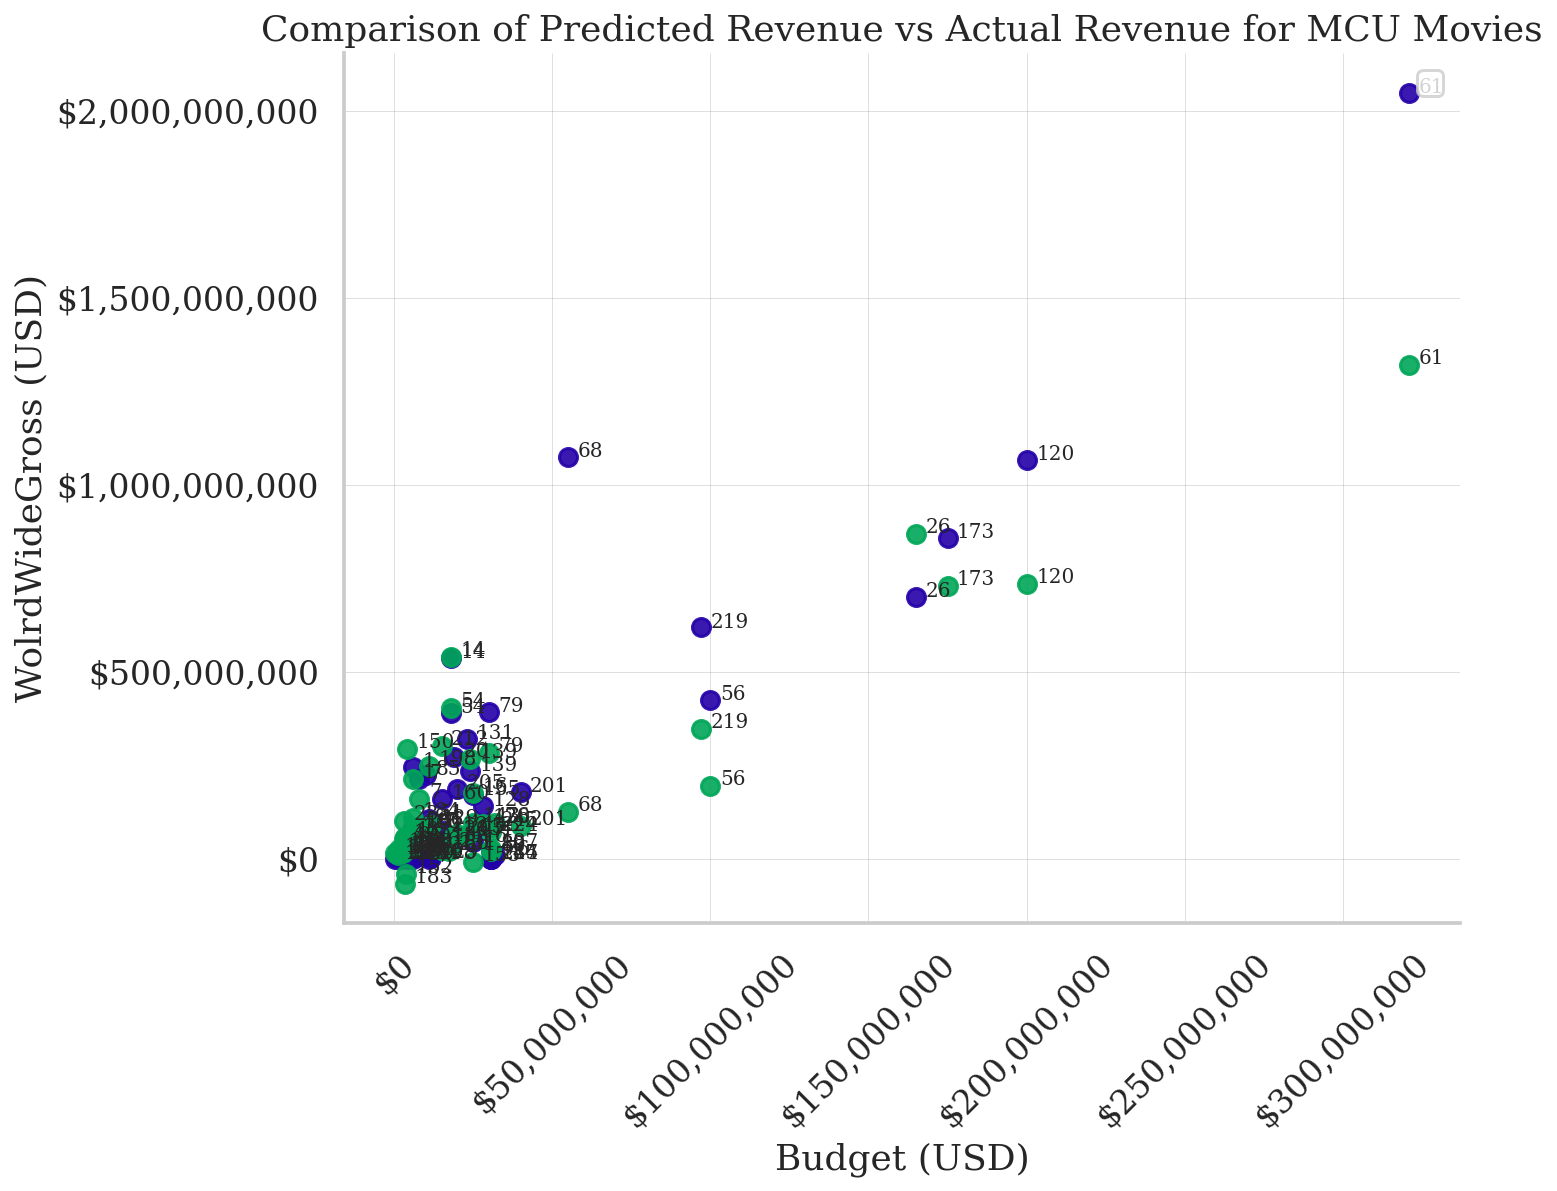

In [70]:
import matplotlib.ticker as mtick

def scatterplot(df, x_dim, y_dim, z_dim):
    x= df[x_dim]
    y= df[y_dim]
    z= df[z_dim]

    fig, ax = plt.subplots(figsize=(10,8))

    #define color array
    colors = ['#2300A8', '#00A658']

    #customize transparency for each dot in the scatter plot

    #plot each x-y
    ax.scatter(x, y, alpha=0.9, color=colors[0])
    ax.scatter(x, z, alpha=0.9, color=colors[1])

    #add title and axes labels
    ax.set_title('Comparison of Predicted Revenue vs Actual Revenue for MCU Movies')
    ax.set_xlabel('Budget (USD)')
    ax.set_ylabel('WolrdWideGross (USD)')

    #remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #add major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    #Change y-axis label style and include Currency format
    ax.ticklabel_format(style='plain', useOffset=False, axis='y')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)


    #Change x-axis label style and include Currency format
    ax.ticklabel_format(style='plain', useOffset=False, axis='x')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)
    plt.xticks(rotation=45)



    #add Legend
    ax.legend()



    for i in test.index: 
        plt.text(test['Budget'][i]+3000000.0, test['Predicted Revenue'][i]+3000000.0, i)
        plt.text(test['Budget'][i]+3000000.0, test['WorldWideGross'][i], i)

    plt.show()
    
scatterplot(test, 'Budget', 'WorldWideGross', 'Predicted Revenue')